# Projeto relatório de fechamento de mercado ibovespa e dólar

## Construir email que chegue na caixa de entrada todos os dias com informaçlões de fechamento do ibovespa e dollar

### Utilizando aula do BOT.CAMP da varos


## Passo 1 - Instalando Importando bibliotecas

In [1]:
#!pip install --user yfinance==0.1.74
#!pip install mplcyberpunk
#!pip install python-dotenv

In [22]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [3]:
import sys
print(sys.executable)


C:\ProgramData\Anaconda3\python.exe


## Passo 2 - Pegando dados do Yahoo Finance

In [4]:
ativos = ['^BVSP', 'BRL=X', 'BTC-USD']
hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

print(f'Hoje é {hoje}, há um ano atrás estavamos em {um_ano_atras}')

dados_mercado = yf.download(ativos, um_ano_atras, hoje)
display(dados_mercado)

Hoje é 2023-04-15 14:00:02.710963, há um ano atrás estavamos em 2022-04-15 14:00:02.710963
[*********************100%***********************]  3 of 3 completed


Adj Close                           Close                          \
               BRL=X       BTC-USD     ^BVSP   BRL=X       BTC-USD     ^BVSP   
Date                                                                           
2022-04-15    4.7010  40553.464844       NaN  4.7010  40553.464844       NaN   
2022-04-16       NaN  40424.484375       NaN     NaN  40424.484375       NaN   
2022-04-17       NaN  39716.953125       NaN     NaN  39716.953125       NaN   
2022-04-18    4.7006  40826.214844  115687.0  4.7006  40826.214844  115687.0   
2022-04-19    4.6520  41502.750000  115057.0  4.6520  41502.750000  115057.0   
...              ...           ...       ...     ...           ...       ...   
2023-04-11    5.0653  30235.058594  106214.0  5.0653  30235.058594  106214.0   
2023-04-12    5.0040  30139.052734  106890.0  5.0040  30139.052734  106890.0   
2023-04-13    4.9169  30399.066406  106458.0  4.9169  30399.066406  106458.0   
2023-04-14    4.9267           NaN  106279.0  4.9267           NaN  106279.0   
2023-04-15    4.9185           NaN       NaN  4.9185           NaN       NaN   

              High                               Low                          \
             BRL=X       BTC-USD     ^BVSP     BRL=X       BTC-USD     ^BVSP   
Date                                                                           
2022-04-15  4.7100  40617.722656       NaN  4.696500  39866.832031       NaN   
2022-04-16     NaN  40633.679688       NaN       NaN  40078.425781       NaN   
2022-04-17     NaN  40570.726562       NaN       NaN  39620.894531       NaN   
2022-04-18  4.7049  40986.320312  116191.0  4.659300  38696.191406  115177.0   
2022-04-19  4.6838  41672.960938  115687.0  4.637000  40618.632812  114277.0   
...            ...           ...       ...       ...           ...       ...   
2023-04-11  5.0676  30509.083984  106455.0  4.989000  29609.300781  101848.0   
2023-04-12  5.0062  30462.480469  108277.0  4.917000  29725.574219  106217.0   
2023-04-13  4.9342  30539.845703  107037.0  4.895642  29878.623047  106220.0   
2023-04-14  4.9621           NaN  106701.0  4.904000           NaN  104934.0   
2023-04-15  4.9185           NaN       NaN  4.907500           NaN       NaN   

              Open                         Volume                            
             BRL=X       BTC-USD     ^BVSP  BRL=X       BTC-USD       ^BVSP  
Date                                                                         
2022-04-15  4.7010  39939.402344       NaN    0.0  2.175686e+10         NaN  
2022-04-16     NaN  40552.316406       NaN    NaN  1.683315e+10         NaN  
2022-04-17     NaN  40417.777344       NaN    NaN  1.908763e+10         NaN  
2022-04-18  4.7006  39721.203125  116182.0    0.0  3.370518e+10   8404900.0  
2022-04-19  4.6520  40828.175781  115687.0    0.0  2.530321e+10         0.0  
...            ...           ...       ...    ...           ...         ...  
2023-04-11  5.0653  29653.679688  101849.0    0.0  2.012126e+10  18725700.0  
2023-04-12  5.0040  30231.582031  106218.0    0.0  1.865193e+10  17345500.0  
2023-04-13  4.9169  29892.740234  106890.0    0.0  1.748772e+10  12182900.0  
2023-04-14  4.9267           NaN  106458.0    0.0           NaN  11501000.0  
2023-04-15  4.9185           NaN       NaN    0.0           NaN         NaN  

[366 rows x 18 columns]

## Passo 3 - Manipulando os dados

In [5]:
dados_fechamento = dados_mercado["Adj Close"]
dados_fechamento.columns = ['Dólar', 'Bitcoin','Ibovespa']

dados_fechamento = dados_fechamento.dropna()
dados_fechamento

,Dólar,Bitcoin,Ibovespa
Date,,,
2022-04-18,4.7006,40826.214844,115687.0
2022-04-19,4.6520,41502.750000,115057.0
2022-04-20,4.6650,41374.378906,114344.0
2022-04-22,4.6208,39740.320312,111078.0
2022-04-25,4.7952,40458.308594,110685.0
...,...,...,...
2023-04-06,5.0332,28044.140625,100822.0
2023-04-10,5.0544,29652.980469,101847.0
2023-04-11,5.0653,30235.058594,106214.0


## Passo 3.2 - Manipulando dados criando tabelas com outros timeframes

In [6]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()
dados_fechamento_anual = dados_fechamento.resample("Y").last()

dados_fechamento_mensal

,Dólar,Bitcoin,Ibovespa
Date,,,
2022-04-30,4.9378,38609.824219,107876.0
2022-05-31,4.7524,31792.310547,111351.0
2022-06-30,5.1809,19784.726562,98542.0
2022-07-31,5.1827,23804.632812,103165.0
2022-08-31,5.1219,20049.763672,109523.0
2022-09-30,5.3962,19431.789062,110037.0
2022-10-31,5.2885,20495.773438,116037.0
2022-11-30,5.2682,17168.566406,112486.0
2022-12-31,5.2668,16642.341797,110031.0


In [7]:
dados_fechamento_anual

,Dólar,Bitcoin,Ibovespa
Date,,,
2022-12-31,5.2668,16642.341797,110031.0
2023-12-31,4.9169,30399.066406,106458.0


In [8]:
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_mes

,Dólar,Bitcoin,Ibovespa
Date,,,
2022-05-31,-0.037547,-0.176575,0.032213
2022-06-30,0.090165,-0.377688,-0.115033
2022-07-31,0.000347,0.203182,0.046914
2022-08-31,-0.011731,-0.157737,0.061629
2022-09-30,0.053554,-0.030822,0.004693
2022-10-31,-0.019959,0.054755,0.054527
2022-11-30,-0.003839,-0.162336,-0.030602
2022-12-31,-0.000266,-0.030650,-0.021825
2023-01-31,-0.028841,0.390386,0.031818


In [9]:
retorno_no_ano

,Dólar,Bitcoin,Ibovespa
Date,,,
2023-12-31,-0.066435,0.82661,-0.032473


In [10]:
retorno_no_dia

,Dólar,Bitcoin,Ibovespa
Date,,,
2022-04-19,-0.010339,0.016571,-0.005446
2022-04-20,0.002794,-0.003093,-0.006197
2022-04-22,-0.009475,-0.039494,-0.028563
2022-04-25,0.037742,0.018067,-0.003538
2022-04-26,0.016892,-0.057858,-0.022334
...,...,...,...
2023-04-06,-0.007396,-0.004750,-0.001545
2023-04-10,0.004212,0.057368,0.010166
2023-04-11,0.002157,0.019630,0.042878


## Passo 4 - Localizando fechamento do dia anterior, retorno do mês e retorno do ano.

In [38]:
def ExtraiRetorno (dados):
    retornos = []
    for i in range(3):
    	retorno = round(dados.iloc[-1,i]*100,2)
    	retornos.append(retorno)
    return retornos

In [39]:
retorno_hoje = ExtraiRetorno(retorno_no_dia)
retorno_nesse_mes = ExtraiRetorno(retorno_no_mes)
retorno_nesse_ano = ExtraiRetorno(retorno_no_ano)

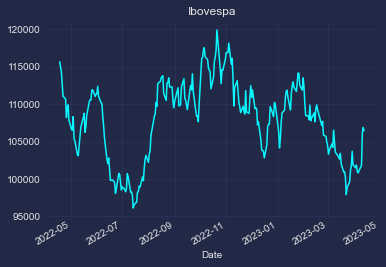

In [46]:
plt.style.use("cyberpunk")
dados_fechamento.plot(y = "Ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")
plt.savefig('Ibovespa.png', dpi = 300)
plt.show()

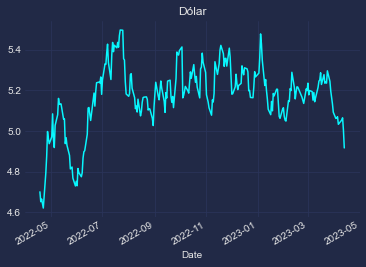

In [43]:
plt.style.use("cyberpunk")
dados_fechamento.plot(y = "Dólar", use_index = True, legend = False)

plt.title("Dólar")
plt.savefig('Dólar.png', dpi = 300)
plt.show()

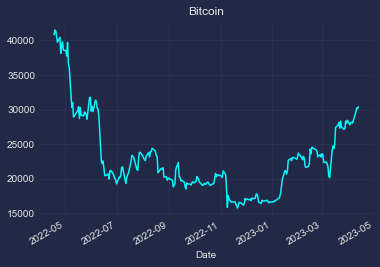

In [44]:
plt.style.use("cyberpunk")
dados_fechamento.plot(y = "Bitcoin", use_index = True, legend = False)

plt.title("Bitcoin")
plt.savefig('Bitcoin.png', dpi = 300)
plt.show()

## Passo 5 - Enviar o e-mail
	Criando senha através do site myaccount.google.com/apppasswords
    Senha salva em arquivo .env

In [14]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [16]:
senha = os.environ.get("senha")
email = os.environ.get("email")

In [41]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com Python"
msg['From'] = email
msg['To'] = email

msg.set_content(f'''Prezado Investidor,

Segue resultados do Ibov, dólar e bitcoin:

	Hoje:
    	Ibov: {retorno_hoje[0]}%
        Dólar: {retorno_hoje[1]}%
        Bitcoin: {retorno_hoje[2]}%
        
	Mês:
    	Ibov: {retorno_nesse_mes[0]}%
        Dólar: {retorno_nesse_mes[1]}%
        Bitcoin: {retorno_nesse_mes[2]}%
        
	12 meses:
    	Ibov: {retorno_nesse_ano[0]}%
        Dólar: {retorno_nesse_ano[1]}%
        Bitcoin: {retorno_nesse_ano[2]}%
        
Att,
Japonês Pica Grossa''')

In [48]:
with open('ibovespa.png','rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')
    
with open('Dólar.png','rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='Dólar.png')
    
with open('Bitcoin.png','rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='Bitcoin.png')

In [49]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha)
    smtp.send_message(msg)